In [66]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [11]:
import os
import pandas as pd
import seaborn as sns
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
os.listdir()

['MSUTypingDatabase',
 'MSUTypingDatabase.tar.gz',
 'keystroke.ipynb',
 '.ipynb_checkpoints']

In [16]:
file = "MSUTypingDatabase/Phase1/001/S1.mp4"

In [18]:
import ffmpeg

# Open the video file and extract the audio stream
audio_stream = ffmpeg.input(file).audio

# Save the audio stream to a new file
audio_stream.output('output_audio.wav').run()



ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

(None, None)

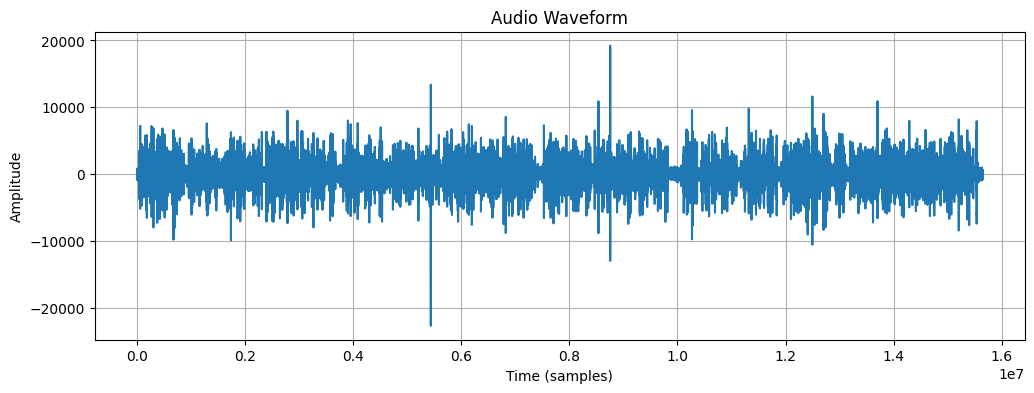

In [21]:
import numpy as np
from scipy.io import wavfile
import matplotlib.pyplot as plt

# Read in the audio file
sample_rate, audio_data = wavfile.read('output_audio.wav')

# Convert the audio data to mono if it is stereo
if audio_data.ndim == 2:
    audio_data = np.mean(audio_data, axis=1)

# Plot the audio waveform
plt.figure(figsize=(12, 4))
plt.plot(audio_data)
plt.title('Audio Waveform')
plt.xlabel('Time (samples)')
plt.ylabel('Amplitude')
plt.grid()
plt.show()


In [31]:
filename = "MSUTypingDatabase/Phase2/001/2013-03-18-17-40-42.txt"
# df = pd.read_csv(txt)
file2 = "MSUTypingDatabase/Phase2/002/2013-03-15-13-27-53.txt"

Phase 2 is a multi-day experiment where each user has 2-5 different recordings.  Each recording is saved as 2 files save as the timestamp of the recording and either .mp4 for the vidoe and .txt for the keystroke information.

The keystroke file format is the following

-------------------------------------
User ID

comma separated key press down ids

comma separated key press down times in milliseconds

comma separated key release ids

comma separated key release times in milliseconds

Text in field at end

-------------------------------------


In [2]:
BASE = "MSUTypingDatabase/Phase2/"

In [3]:
dirs = os.listdir(BASE)
dirs

['030',
 '009',
 '024',
 '001',
 '015',
 '007',
 '018',
 '008',
 '006',
 '025',
 '022',
 '005',
 '027',
 '002',
 '020',
 '016',
 '011',
 '017',
 '003',
 '013',
 '012',
 '004',
 '023',
 '021',
 '019',
 '028',
 '029',
 '026',
 '014',
 '010']

In [4]:
from tqdm import tqdm

userids = []
press_keyids = []
press_times = []
release_keyids = []
release_times = []
texts = []

i = 1
for di in tqdm(dirs, total=len(dirs)):
    curr_dir = os.path.join(BASE, di)
    for file in os.listdir(curr_dir):
        if file.endswith('txt'):
            path = os.path.join(curr_dir, file)
            # print(i)
            # print(file)
            # print('\n')
            # i += 1

            with open(path, 'r') as f:
                lines = f.readlines()
                userid = int(lines[0])
                
                press_keyid = list(map(lambda x: int(x), lines[2].strip('\n').split(',')))
                press_time = list(map(lambda x: int(x), lines[4].strip('\n').split(',')))
                release_keyid = list(map(lambda x: int(x), lines[6].strip('\n').split(',')))
                release_time = list(map(lambda x: int(x), lines[8].strip('\n').split(',')))
                text = lines[10].strip('\n')

                userids.append(userid)
                press_keyids.append(press_keyid)
                press_times.append(press_time)
                release_keyids.append(release_keyid)
                release_times.append(release_time)
                texts.append(text)


dic = {
    'userid' : userids,
    'keyid_press' : press_keyids,
    'time_press' : press_times,
    'keyid_release' : release_keyids,
    'time_release' : release_times,
    'text' : texts
}
print(len(userids))
print(len(press_keyids))
print(len(press_times))
print(len(release_keyids))
print(len(texts))

df = pd.DataFrame(dic)

100%|███████████████████████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 675.12it/s]

140
140
140
140
140


In [5]:
def find_hd(id_press, time_press, id_release, time_release):
    res = []
    # for i, key in enumerate(id_press):
    for i, time in enumerate(time_press):
        if len(time_release) > len(time_press):
            diff = time_release[i+1] - time
        elif len(time_release) == len(time_press):
            diff = time_release[i] - time
        else:
            return None

        res.append(diff)


    return res

In [6]:
df['ppd'] = df['time_press'].apply(lambda x : [abs(x[i+1] - x[i]) for i in range(len(x)-1)])
df['rrd'] = df['time_release'].apply(lambda x : [abs(x[i+1] - x[i]) for i in range(len(x)-1)])
df['hd'] = df.apply(lambda x : find_hd(x['keyid_press'], x['time_press'], x['keyid_release'], x['time_release']), axis=1)

In [7]:
df

,userid,keyid_press,time_press,keyid_release,time_release,text,ppd,rrd,hd
0,30,"[16, 73, 32, 72, 65, 86, 69, 32, 67, 79, 77, 6...","[1372157834144, 1372157834280, 1372157834536, ...","[73, 16, 32, 72, 65, 86, 69, 32, 67, 79, 77, 6...","[1372157834360, 1372157834383, 1372157834623, ...",I have come early in the morning today for wor...,"[136, 256, 256, 143, 193, 239, 168, 440, 177, ...","[23, 240, 232, 193, 160, 231, 184, 448, 152, 2...","[216, 103, 87, 63, 113, 80, 72, 88, 96, 71, 80..."
1,30,"[83, 79, 32, 84, 79, 68, 65, 89, 32, 16, 73, 3...","[1370371494228, 1370371494572, 1370371494907, ...","[9, 83, 79, 32, 84, 79, 68, 65, 89, 32, 16, 73...","[1370371491596, 1370371494315, 1370371494659, ...",so today I am typing again. This will give ano...,"[344, 335, 920, 160, 424, 112, 160, 232, 240, ...","[2719, 344, 328, 937, 127, 416, 144, 128, 272,...","[87, 87, 80, 97, 64, 56, 88, 56, 96, 168, 56, ..."
2,30,"[83, 79, 32, 84, 72, 73, 83, 32, 73, 83, 32, 6...","[1371245332305, 1371245332464, 1371245332704, ...","[83, 79, 32, 84, 72, 73, 83, 32, 73, 83, 32, 6...","[1371245332400, 1371245332528, 1371245332800, ...",so this is another session that I am going to ...,"[159, 240, 416, 192, 216, 104, 144, 232, 112, ...","[128, 272, 392, 208, 184, 152, 128, 208, 128, ...","[95, 64, 96, 72, 88, 56, 104, 88, 64, 80, 80, ..."
3,30,"[83, 79, 32, 16, 73, 32, 65, 77, 32, 84, 89, 8...","[1370271363707, 1370271363835, 1370271364099, ...","[9, 83, 79, 32, 16, 73, 32, 65, 77, 32, 84, 89...","[1370271361764, 1370271363779, 1370271363915, ...",so I am typing this again. I probably had some...,"[128, 264, 376, 128, 208, 111, 121, 159, 344, ...","[2015, 136, 296, 456, 0, 239, 113, 79, 184, 33...","[72, 80, 112, 192, 64, 95, 97, 55, 80, 72, 64,..."
4,9,"[16, 84, 73, 8, 8, 16, 73, 84, 32, 87, 83, 8, ...","[1363801895424, 1363801895736, 1363801895991, ...","[16, 84, 73, 8, 8, 73, 16, 84, 32, 87, 83, 8, ...","[1363801895816, 1363801895863, 1363801896063, ...","It was the best of times, it was the worst of ...","[312, 255, 384, 112, 153, 150, 161, 137, 727, ...","[47, 200, 352, 152, 272, 80, 88, 224, 665, 287...","[392, 127, 72, 40, 80, 199, 129, 56, 143, 81, ..."
...,...,...,...,...,...,...,...,...,...
135,10,"[16, 77, 89, 32, 78, 65, 77, 69, 32, 73, 83, 3...","[1374092831375, 1374092831471, 1374092831847, ...","[16, 77, 89, 32, 78, 65, 77, 69, 32, 73, 83, 3...","[1374092831559, 1374092831583, 1374092831983, ...",My name is Shannon Houtrouw. My wife's name is...,"[96, 376, 136, 512, 120, 312, 96, 112, 168, 80...","[24, 400, 144, 488, 176, 296, 48, 128, 160, 80...",None
136,10,"[16, 76, 79, 78, 71, 32, 65, 83, 32, 16, 73, 3...","[1374092481207, 1374092481335, 1374092481695, ...","[76, 16, 79, 78, 71, 32, 65, 83, 32, 16, 73, 3...","[1374092481439, 1374092481495, 1374092481871, ...",Long as I remember the rains been pouring down...,"[128, 360, 120, 200, 208, 256, 88, 128, 296, 5...","[56, 376, 112, 192, 183, 321, 23, 105, 335, 25...","[232, 160, 176, 168, 160, 135, 200, 135, 112, ..."
137,10,"[16, 65, 77, 65, 90, 73, 78, 71, 32, 82, 8, 71...","[1374092187895, 1374092187990, 1374092188166, ...","[16, 65, 77, 65, 90, 73, 78, 71, 32, 82, 8, 71...","[1374092188046, 1374092188142, 1374092188294, ...",Amazing grace how sweet the sound that saved a...,"[95, 176, 168, 616, 176, 80, 112, 56, 768, 728...","[96, 152, 152, 680, 120, 72, 80, 112, 688, 768...","[151, 152, 128, 112, 176, 120, 112, 80, 136, 5..."
138,10,"[16, 68, 65, 82, 75, 32, 79, 70, 32, 84, 72, 6...","[1374092634478, 1374092634638, 1374092634822, ...","[16, 68, 65, 82, 75, 32, 79, 70, 32, 84, 72, 6...","[1374092634814, 1374092634814, 1374092634950, ...",Dark of the moon on the sixthe of June in a Ke...,"[160, 184, 152, 432, 120, 136, 96, 56, 120, 16...","[0, 136, 136, 456, 144, 88, 56, 80, 160, 0, 56...",None


In [20]:
df.isna().sum()

userid            0
keyid_press       0
time_press        0
keyid_release     0
time_release      0
text              0
ppd               0
rrd               0
hd               55
dtype: int64

In [16]:
filtered_df = df.dropna()

In [19]:
filtered_df.isna().sum()

userid           0
keyid_press      0
time_press       0
keyid_release    0
time_release     0
text             0
ppd              0
rrd              0
hd               0
dtype: int64

In [9]:
temp1 = df.query('userid == 1')
temp2 = df.query('userid == 2')
temp3 = df.query('userid == 3')
temp4 = df.query('userid == 4')
temp5 = df.query('userid == 5')

/home/nano-tech/.local/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning: 7.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/nano-tech/.local/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning: 7.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


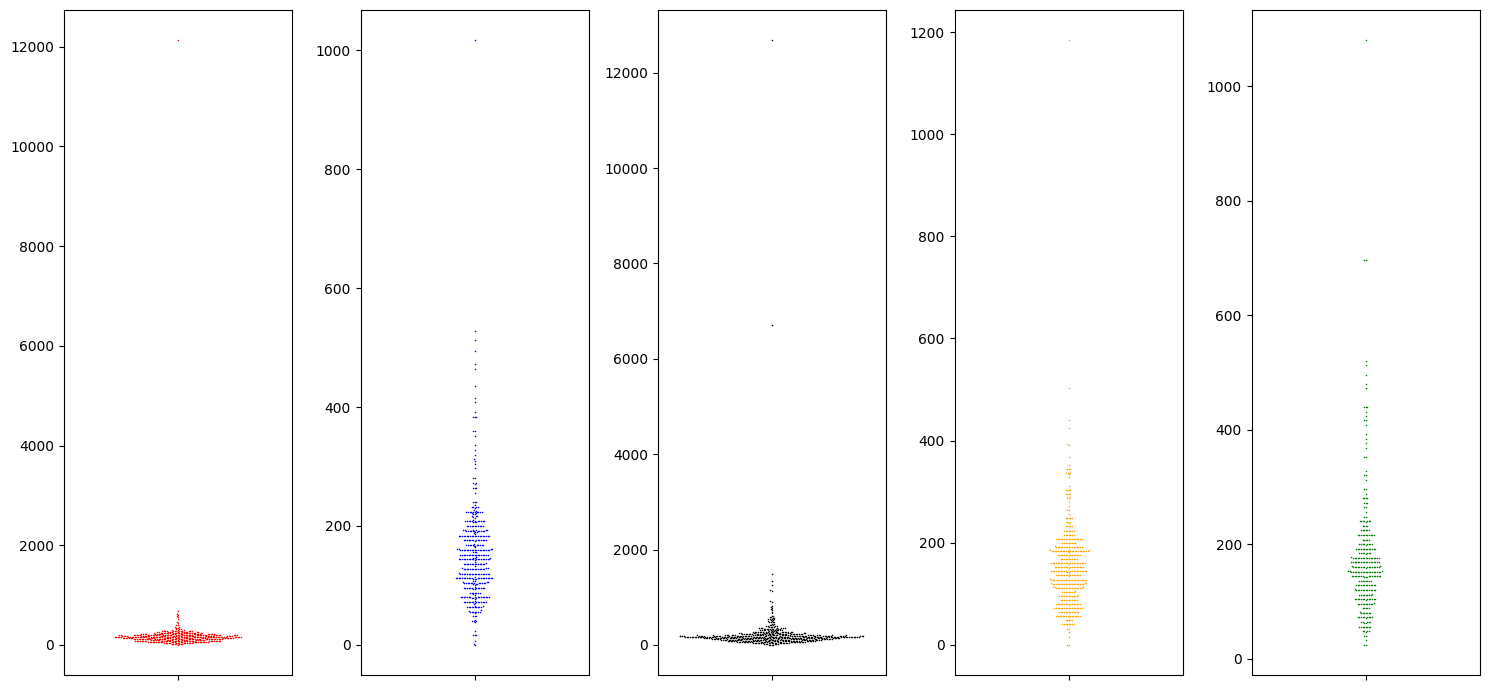

In [12]:
fig, axes = plt.subplots(1, 5, figsize = (15, 7))

sns.swarmplot(y = temp2.rrd.values[0], size = 1.1, color = 'red', ax = axes[0])

sns.swarmplot(y = temp2.rrd.values[1], size = 1.1, color = 'blue', ax = axes[1])

sns.swarmplot(y = temp2.rrd.values[2], size = 1.1, color = 'black', ax = axes[2])

sns.swarmplot(y = temp2.rrd.values[3], size = 1.1, color = 'orange', ax = axes[3])

sns.swarmplot(y = temp2.rrd.values[4], size = 1.1, color = 'green', ax = axes[4])
fig.tight_layout()

plt.show()

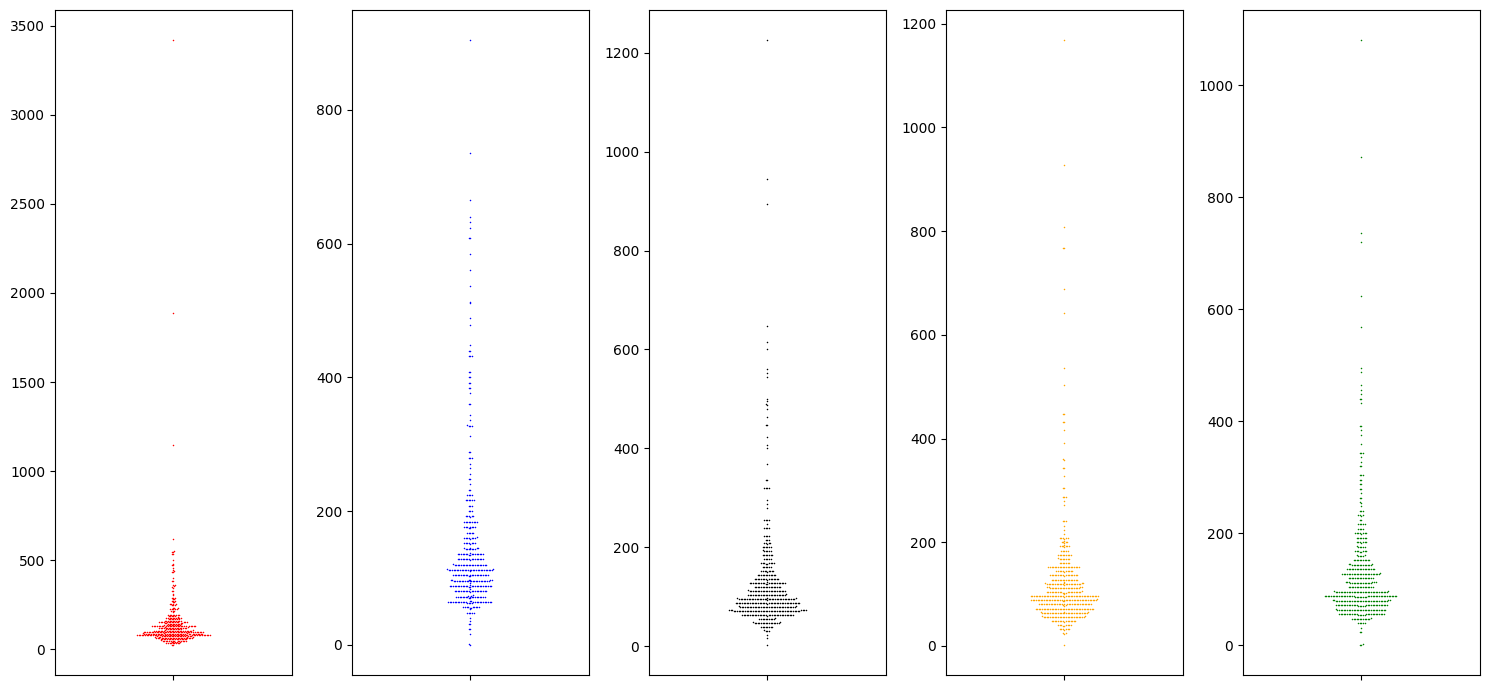

In [15]:
fig, axes = plt.subplots(1, 5, figsize = (15, 7))

sns.swarmplot(y = temp3.ppd.values[0], size = 1.1, color = 'red', ax = axes[0])

sns.swarmplot(y = temp3.ppd.values[1], size = 1.1, color = 'blue', ax = axes[1])

sns.swarmplot(y = temp3.ppd.values[2], size = 1.1, color = 'black', ax = axes[2])

sns.swarmplot(y = temp3.ppd.values[3], size = 1.1, color = 'orange', ax = axes[3])

sns.swarmplot(y = temp3.ppd.values[4], size = 1.1, color = 'green', ax = axes[4])
fig.tight_layout()

plt.show()

In [26]:
filtered_df.groupby('userid')['hd'].count()

userid
1     3
2     5
3     3
4     2
5     4
6     4
7     2
8     5
9     4
10    3
12    4
14    1
15    3
16    8
18    4
19    1
20    4
21    4
23    2
24    5
25    1
26    1
27    4
28    3
29    1
30    4
Name: hd, dtype: int64

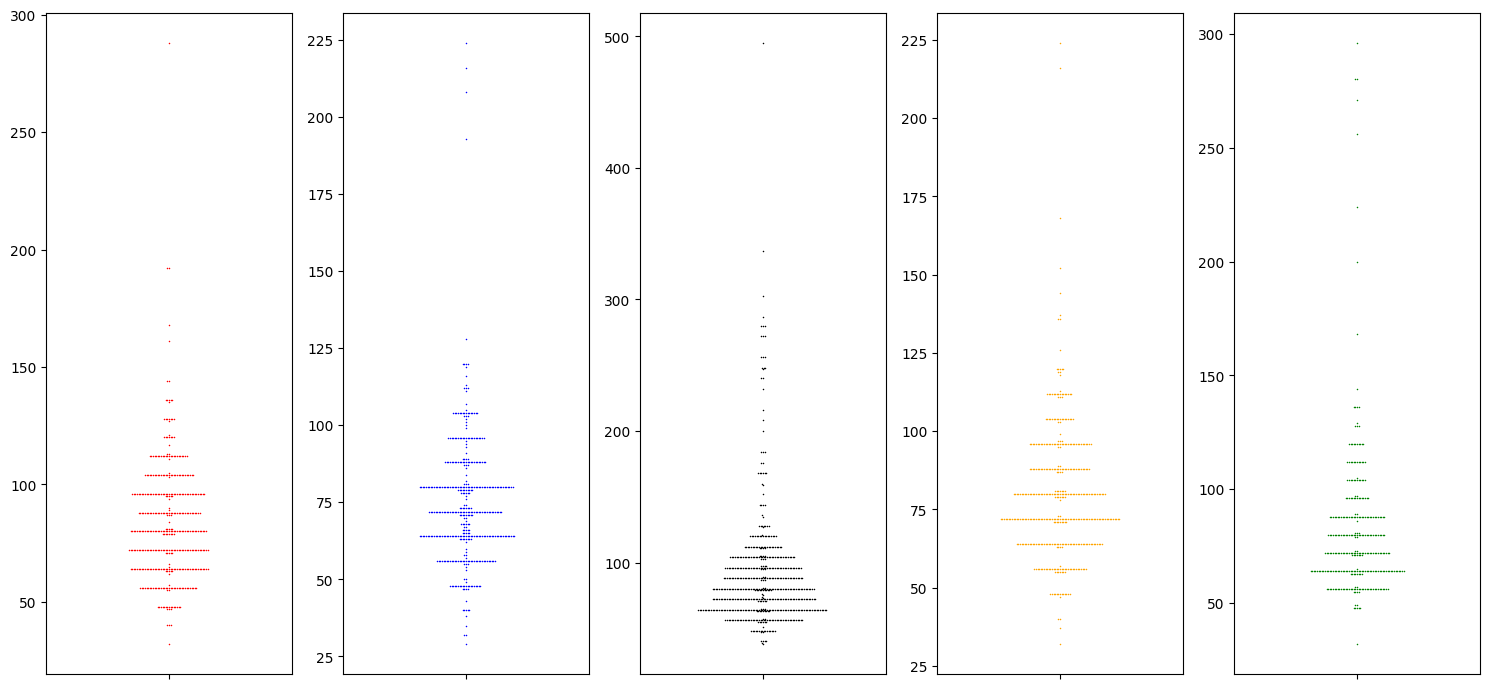

In [28]:
fig, axes = plt.subplots(1, 5, figsize = (15, 7))

sns.swarmplot(y = temp2.hd.values[0], size = 1.1, color = 'red', ax = axes[0])

sns.swarmplot(y = temp2.hd.values[1], size = 1.1, color = 'blue', ax = axes[1])

sns.swarmplot(y = temp2.hd.values[2], size = 1.1, color = 'black', ax = axes[2])

sns.swarmplot(y = temp2.hd.values[3], size = 1.1, color = 'orange', ax = axes[3])

sns.swarmplot(y = temp2.hd.values[4], size = 1.1, color = 'green', ax = axes[4])
fig.tight_layout()

plt.show()

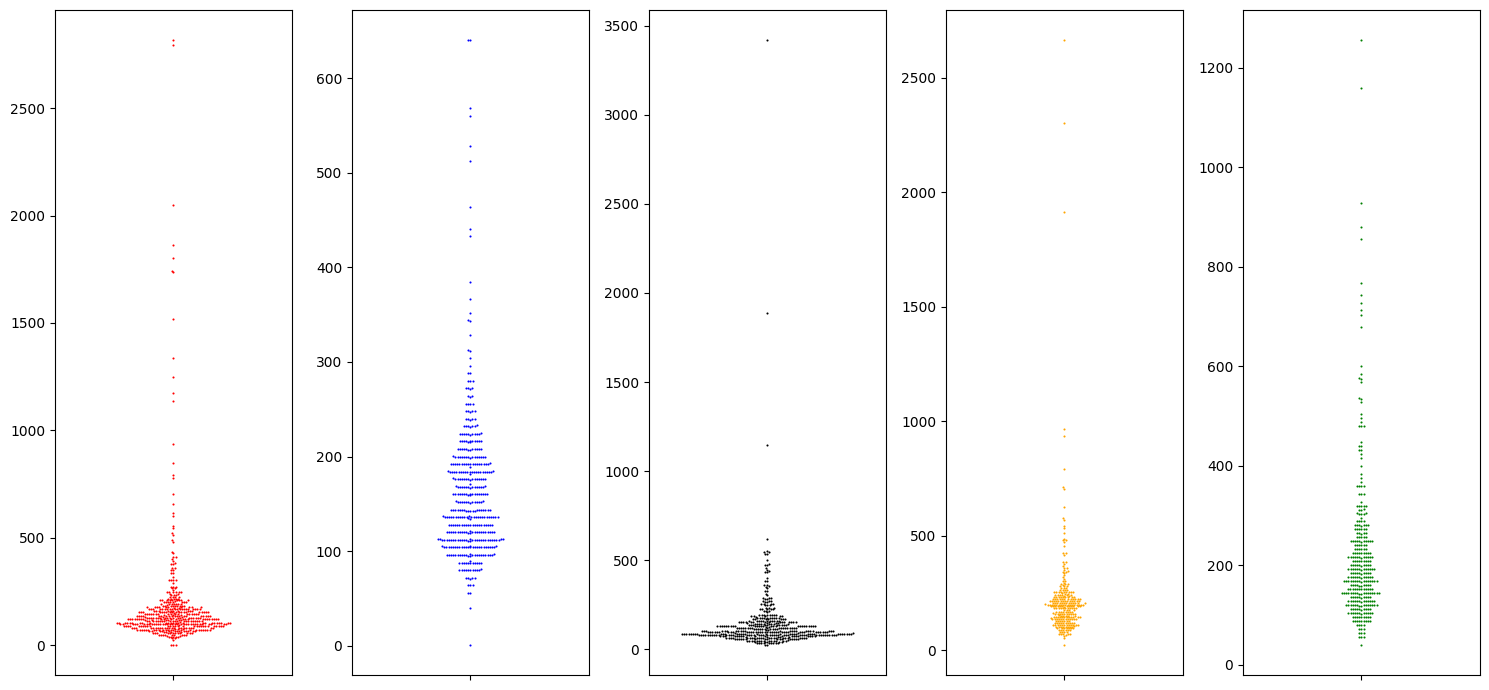

In [13]:
fig, axes = plt.subplots(1, 5, figsize = (15, 7))

sns.swarmplot(y = temp1.ppd.values[0], size = 1.5, color = 'red', ax = axes[0])

sns.swarmplot(y = temp2.ppd.values[0], size = 1.5, color = 'blue', ax = axes[1])

sns.swarmplot(y = temp3.ppd.values[0], size = 1.5, color = 'black', ax = axes[2])

sns.swarmplot(y = temp4.ppd.values[0], size = 1.5, color = 'orange', ax = axes[3])

sns.swarmplot(y = temp5.ppd.values[0], size = 1.5, color = 'green', ax = axes[4])
fig.tight_layout()

plt.show()

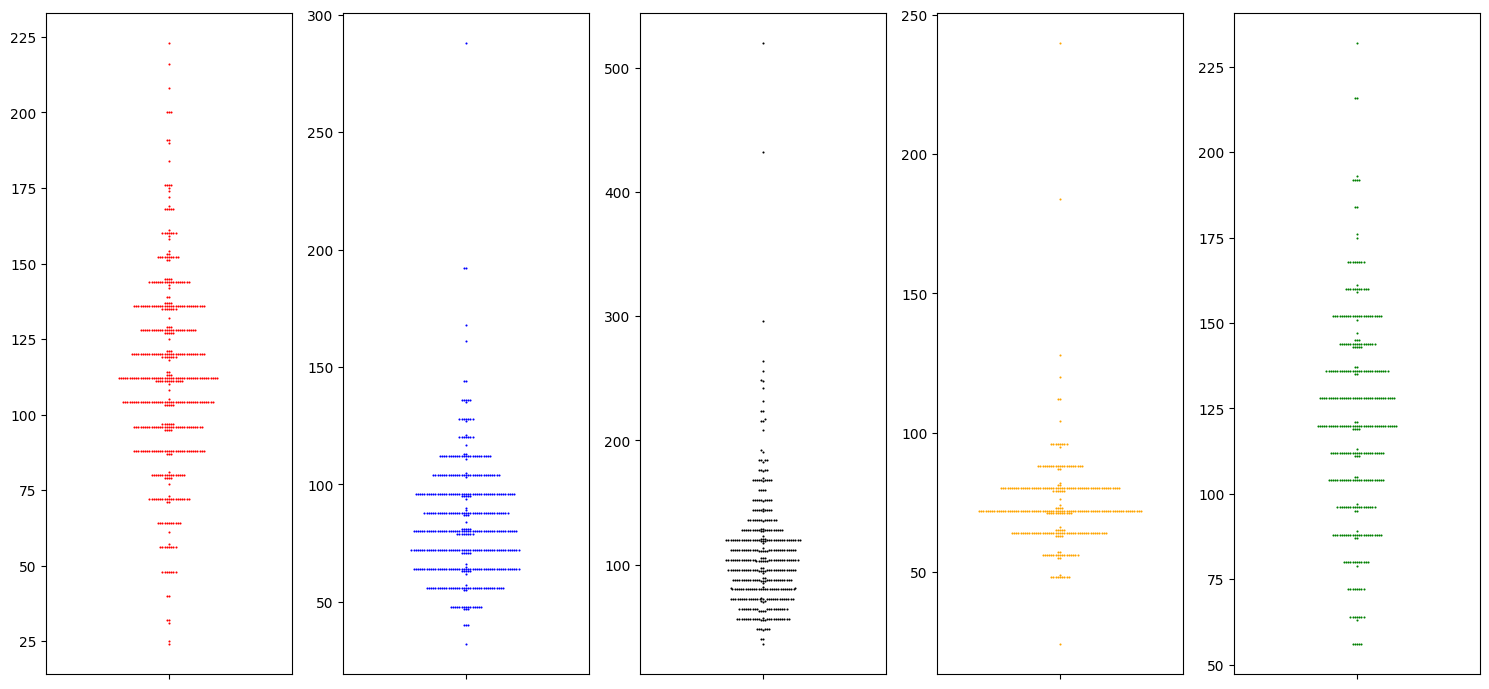

In [56]:
fig, axes = plt.subplots(1, 5, figsize = (15, 7))

sns.swarmplot(y = temp1.hd.values[0], size = 1.5, color = 'red', ax = axes[0])

sns.swarmplot(y = temp2.hd.values[0], size = 1.5, color = 'blue', ax = axes[1])

sns.swarmplot(y = temp3.hd.values[1], size = 1.5, color = 'black', ax = axes[2])

sns.swarmplot(y = temp4.hd.values[0], size = 1.5, color = 'orange', ax = axes[3])

sns.swarmplot(y = temp5.hd.values[0], size = 1.5, color = 'green', ax = axes[4])
fig.tight_layout()

plt.show()

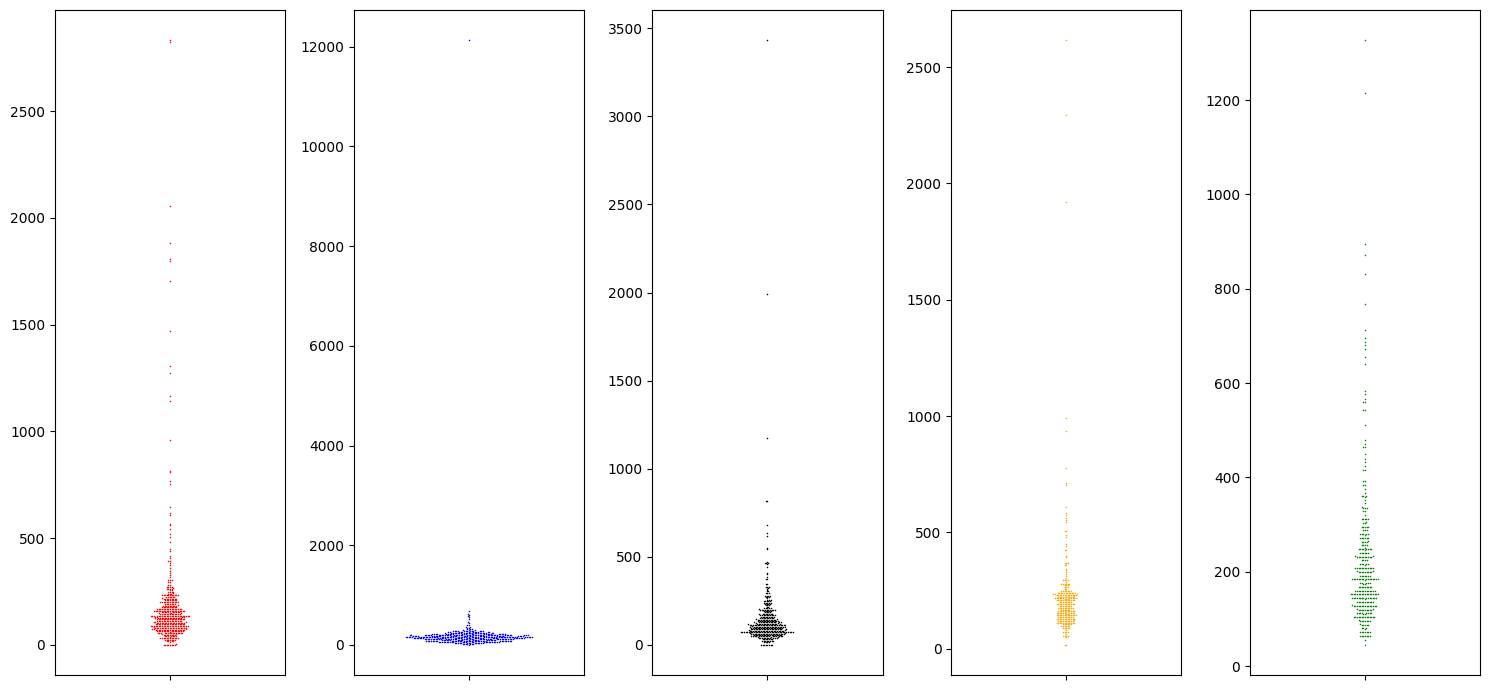

In [58]:
fig, axes = plt.subplots(1, 5, figsize = (15, 7))

sns.swarmplot(y = temp1.rrd.values[0], size = 1.1, color = 'red', ax = axes[0])

sns.swarmplot(y = temp2.rrd.values[0], size = 1.1, color = 'blue', ax = axes[1])

sns.swarmplot(y = temp3.rrd.values[0], size = 1.1, color = 'black', ax = axes[2])

sns.swarmplot(y = temp4.rrd.values[0], size = 1.1, color = 'orange', ax = axes[3])

sns.swarmplot(y = temp5.rrd.values[0], size = 1.1, color = 'green', ax = axes[4])
fig.tight_layout()

plt.show()

In [16]:
temp.ppd.values[0]

[96,
 304,
 138,
 134,
 120,
 112,
 120,
 1176,
 97,
 119,
 104,
 160,
 112,
 72,
 152,
 80,
 1,
 111,
 184,
 104,
 136,
 192,
 64,
 1248,
 104,
 248,
 112,
 200,
 88,
 136,
 176,
 64,
 96,
 192,
 160,
 152,
 144,
 152,
 80,
 120,
 104,
 184,
 168,
 208,
 848,
 104,
 112,
 176,
 160,
 64,
 80,
 119,
 56,
 48,
 153,
 71,
 89,
 71,
 161,
 127,
 41,
 168,
 72,
 81,
 127,
 57,
 128,
 351,
 41,
 96,
 175,
 97,
 112,
 55,
 792,
 208,
 616,
 136,
 553,
 111,
 72,
 136,
 88,
 96,
 104,
 128,
 152,
 104,
 112,
 184,
 544,
 104,
 65,
 127,
 48,
 120,
 240,
 136,
 264,
 160,
 112,
 120,
 272,
 104,
 88,
 96,
 64,
 152,
 208,
 144,
 480,
 304,
 192,
 104,
 88,
 80,
 64,
 96,
 2,
 118,
 104,
 112,
 104,
 288,
 152,
 120,
 144,
 152,
 144,
 136,
 105,
 63,
 112,
 88,
 120,
 112,
 336,
 144,
 120,
 136,
 56,
 128,
 96,
 72,
 144,
 2816,
 176,
 88,
 119,
 65,
 87,
 48,
 169,
 175,
 73,
 167,
 81,
 191,
 88,
 234,
 96,
 199,
 72,
 88,
 168,
 408,
 152,
 80,
 49,
 135,
 56,
 128,
 168,
 160,
 304,
 200,

In [157]:
df['hd'].isna().sum()

55

In [72]:
with open(file2, 'r') as f:
    # f.seek(4)
    # for line in f:
    #     print(line)
    lines = f.readlines()
    # print(lines)

print(map(lines[0])
print(len(lines[2].strip('\n').split(',')))
print(lines[2])
print(len(lines[4].strip('\n').split(',')))
print(lines[4])
print(len(lines[6].strip('\n').split(',')))
print(lines[6])
print(len(lines[8].strip('\n').split(',')))
print(lines[8])

002

424
16,73,84,32,87,65,83,32,84,72,69,32,66,69,83,84,32,79,70,32,84,73,77,69,83,188,32,73,84,32,87,65,83,32,84,72,69,32,87,79,82,83,84,32,79,70,32,84,73,77,69,83,188,32,73,84,32,87,65,83,32,84,72,69,32,65,71,69,32,79,70,32,87,73,83,68,79,77,188,32,73,84,32,87,65,83,32,84,72,69,32,65,71,69,32,79,70,32,70,79,79,76,73,83,72,78,69,83,83,188,32,73,84,32,87,65,83,32,84,72,69,32,69,80,79,67,72,32,79,70,32,66,69,76,73,69,70,188,32,73,84,32,87,65,83,32,84,72,69,32,69,80,79,67,72,32,79,70,32,73,78,67,82,69,68,85,76,73,84,89,188,32,73,84,32,87,65,83,32,84,72,69,32,83,69,65,83,79,78,32,79,70,32,16,76,73,71,72,84,188,32,73,84,32,87,65,83,32,84,72,69,32,83,69,65,83,79,78,32,79,70,32,16,68,65,82,75,78,69,83,83,188,32,73,84,32,87,65,83,32,84,72,69,32,83,80,82,73,78,71,32,79,70,32,72,79,80,69,188,32,73,84,32,87,65,83,32,84,72,69,32,87,73,78,84,69,82,32,79,70,32,68,69,83,80,65,73,82,188,32,87,69,32,72,65,68,32,69,86,69,82,89,84,72,73,78,71,32,66,69,70,79,82,69,32,85,83,188,32,87,69,32,72,65,68,32,78